# Importing Tools and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pickle


# Importing Data

In [2]:
# Dataset contains 50,000 rows 
df = pd.read_csv("/Users/gauravlohkna/Downloads/IMDB Dataset.csv")
df


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
# Converting the sentiments to 0 for negative and 1 for positive
df['sentiment'] = np.where(df['sentiment'] == "positive", 1, 0)
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


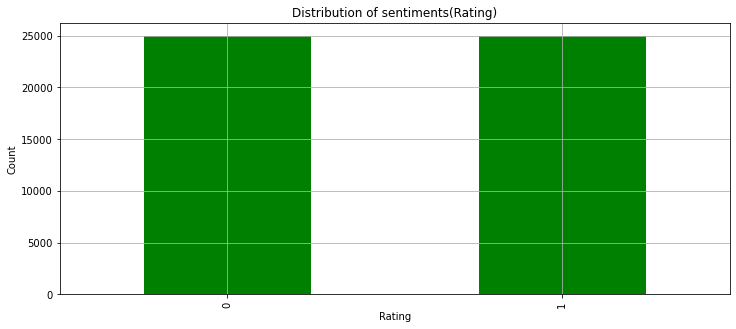

In [4]:
# Distribution of the sentiments
plt.figure(figsize=(12,5))
df['sentiment'].value_counts().sort_index().plot(kind='bar',color = 'Green')
plt.title('Distribution of sentiments(Rating)')
plt.grid()
plt.xlabel('Rating')
plt.ylabel('Count')
ax = plt.axes()


# Splitting the data


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], \
                                                    test_size=0.25, random_state=0)

print('Load %d training examples and %d validation examples. \n' %(X_train.shape[0],X_test.shape[0]))
print('Show a review in the training set : \n', X_train.iloc[10])
X_train,y_train

Load 37500 training examples and 12500 validation examples. 

Show a review in the training set : 
 Wow, was this version of THE RACKETEER tough to watch! While none of the other reviews have mentioned this, the public domain version I watched was seriously flawed. The sound track was off by about 10 seconds--meaning the dialog and action never came close to matching. So, you'd hear something occur well before you saw it--a very confusing proposition! The worst is where you hear a gun shot and only later doe the guy get hit and slump to his death in a taxi.<br /><br />While this seriously marred the film, it also made concentrating on the dialog easier--and showed the serious shortcomings of it as well. The dialog was simply awful--often delivered with almost no inflection or feeling. As one review said, it was like watching a high school play. Part of this is understandable, as sound was a new medium, but this film's dialog was bad even compared to other 1929 films--really bad. And, l

(39758    This is a story of two dogs and a cat looking ...
 18457    A paranoid scientist creates a wolfman by tran...
 33239    Class Reunion is a very underated comedy gem. ...
 35006    This film IS brilliant...... without a doubt. ...
 30982    La Chute de la Maison Usher, or The Fall of th...
                                ...                        
 21243    I did not set very high expectations for this ...
 45891    THE BLOB is a great horror movie, not merely b...
 42613    After too many years of waiting, Anne Rivers S...
 43567    I am a massive fan of the LoG. I thought the f...
 2732     AG was an excellent presentation of drama, sus...
 Name: review, Length: 37500, dtype: object,
 39758    1
 18457    0
 33239    1
 35006    1
 30982    0
         ..
 21243    1
 45891    1
 42613    1
 43567    0
 2732     1
 Name: sentiment, Length: 37500, dtype: int64)

# Data Cleaning

In [6]:
def cleanData(raw_text, remove_stopwords=False, stemming=False, split_text=False, \
             ):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'html.parser').get_text()
    letters_only = re.sub("[^a-zA-Z]", " ", text)
    words = letters_only.lower().split() 
    
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        
    if stemming==True:

        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
        
    if split_text==True:
        return (words)
    
    return( " ".join(words))

In [7]:
import re
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag
from bs4 import BeautifulSoup 
import logging
#from wordcloud import WordCloud

#from gensim.models import Word2Vec
#from gensim.models.keyedvectors import KeyedVectors

X_train_cleaned = []
X_test_cleaned = []

for d in X_train:
    X_train_cleaned.append(cleanData(d))
print('A cleaned review in the training set : \n\n',  X_train_cleaned[10])
    
for d in X_test:
    X_test_cleaned.append(cleanData(d))

A cleaned review in the training set : 

 wow was this version of the racketeer tough to watch while none of the other reviews have mentioned this the public domain version i watched was seriously flawed the sound track was off by about seconds meaning the dialog and action never came close to matching so you d hear something occur well before you saw it a very confusing proposition the worst is where you hear a gun shot and only later doe the guy get hit and slump to his death in a taxi while this seriously marred the film it also made concentrating on the dialog easier and showed the serious shortcomings of it as well the dialog was simply awful often delivered with almost no inflection or feeling as one review said it was like watching a high school play part of this is understandable as sound was a new medium but this film s dialog was bad even compared to other films really bad and like many of these early sound films the film was just too talky with sappy and overly melodramatic 

# Training the model

In [8]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
countVect = CountVectorizer() 
X_train_countVect = countVect.fit_transform(X_train_cleaned)
print("Number of features : %d \n" %len(countVect.get_feature_names())) #6378 
print("A few feature names : \n", countVect.get_feature_names()[::1000])


# Train MultinomialNB classifier
mnb = MultinomialNB()
mnb.fit(X_train_countVect, y_train)

Number of features : 89902 

A few feature names : 
 ['aa', 'adultry', 'allmore', 'annoying', 'arrrggghhhh', 'avenger', 'bardo', 'belmonndo', 'blackjack', 'booms', 'broadened', 'cab', 'cart', 'charged', 'cinched', 'colada', 'confusions', 'cosmology', 'crunchy', 'daulton', 'demonio', 'diefenthal', 'distributor', 'dreamboat', 'ecoffey', 'enamored', 'estonian', 'extrodinaire', 'feminized', 'fleshes', 'franky', 'games', 'gilyard', 'grabys', 'gunfighting', 'harsh', 'hesitating', 'hooves', 'icp', 'indestructibility', 'internationalist', 'jancie', 'jumpsuits', 'kielbasa', 'kuo', 'leaguer', 'linton', 'luger', 'malozzie', 'mathers', 'mendes', 'minx', 'mopester', 'mutinies', 'neva', 'nueve', 'oooooozzzzzzed', 'overshadows', 'pastor', 'pervious', 'plantation', 'postpone', 'programed', 'qotsa', 'ravage', 'rehire', 'retentive', 'rodder', 'saccharin', 'scarllett', 'segregationist', 'shellacked', 'simplifying', 'smoothest', 'spaniard', 'stamper', 'streneously', 'superheroes', 'tadeu', 'tenko', 'thyro

MultinomialNB()

In [16]:


# create an iterator object with write permission - model.pkl
with open('Model_sentiment_countVect', 'wb') as files:
    pickle.dump(countVect, files)

In [17]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,roc_auc_score
def modelEvaluation(predictions):
    '''
    Print model evaluation to predicted result 
    '''
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, predictions)))
    print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions))

In [18]:
predictions = mnb.predict(countVect.transform(X_test_cleaned))
modelEvaluation(predictions)


Accuracy on validation set: 0.8453

Confusion Matrix : 
 [[5519  772]
 [1162 5047]]


# Pickling the model to use it with flask

In [19]:
# create an iterator object with write permission - model.pkl
with open('Model_sentiment_mnb', 'wb') as files:
    pickle.dump(mnb, files)